In [1]:
import gensim.models
import pandas as pd

df = pd.read_csv('./merged.csv')

In [2]:
corpus = df['lyrics'].tolist()

In [194]:
print(len(corpus))

1674


In [6]:
## 형태소 분리
contents_tokens = [Okt().morphs(sent, stem=True) for sent in corpus]
new_corpus = []

for cont in tqdm(contents_tokens):
    sentence = ''
    for word in cont:
        sentence = sentence + ' ' + word
    new_corpus.append(sentence)


100%|██████████| 1674/1674 [00:00<00:00, 24730.69it/s]


In [10]:
import numpy as np
print(np.shape(new_corpus))

(1674,)


In [8]:
print(df.head())

  artist_names  track_name                                             lyrics  \
0          IVE        I AM  다른 문을 열어, 따라갈 필요는 없어 넌 너의 길로, 난 나의 길로, mm 하루하루...   
1          IVE      Kitsch  It's our time 우린 달라, 특별한 게 좋아 Oh, what a good ...   
2        Jimin  Like Crazy  She's saying, "Baby, 생각하지 마" There's not a bad...   
3        JISOO      FLOWER  Eh-eh-eh-eh Eh-eh-eh-eh A-B-C, Do-Re-Mi 만큼 착했던...   
4     NewJeans         OMG  이 노래는 it's about you, baby Only you You, you, ...   

       r      g      b  
0   41.0   41.0   41.0  
1   41.0   41.0   41.0  
2  156.0  152.0  151.0  
3   39.0   33.0    8.0  
4  195.0  195.0  195.0  


## TF-IDF 벡터로 변환 후 여러 머신러닝 기법 비교

In [3]:
from nltk.tokenize import word_tokenize
import nltk
from tqdm import *

In [4]:
import konlpy
from konlpy.tag import Okt

In [5]:
import re
for i in range (len(corpus)):
    corpus[i] = corpus[i].replace('(', '').replace(')', '').replace(',', '').replace('-','').replace('\'', '')

In [ ]:
print(corpus[0])

In [ ]:
query = "너가 너무 그립다"

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

In [ ]:
corpus.append(query)
tfidf_matrix = tfidf.fit_transform(corpus)

In [ ]:
print(tfidf_matrix.shape)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X = tfidf_matrix[:-1]
y = df['r']

In [ ]:
from pycaret.regression import *

optimizer = setup(X, target=y, train_size = 0.8)

In [ ]:
comp = compare_models(sort='RMSE')

In [ ]:
## 형태소 분리
contents_tokens = [Okt().morphs(sent, stem=True) for sent in corpus]
new_corpus = []

for cont in tqdm(contents_tokens):
    sentence = ''
    for word in cont:
        sentence = sentence + ' ' + word
    new_corpus.append(sentence)
    
query = "바람이 쌀쌀 부는 겨울"
tokenized_query = Okt().morphs(query, stem=True)

for word in tokenized_query:
    sentence = ''
    for word in cont:
        sentence = sentence + ' ' + word
new_corpus.append(sentence)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(new_corpus)

In [10]:
print(new_corpus[-2])

 여기다 이미 제법 겨울 이야 초록 을 감추다 roadside 아무 도 눈 이 온 걸 모르다 그 하얗다 골목 그게 많이 기억나다 Uh 기다림 은 많이 하다 맘 이 가다 곳 그렇다 건 처음 부터 너 뿐 인 걸 있다 혼자 는 그만하다 싶다 But dont know if this is what you want too So I need to know Are you down to ride ? 새벽녘 별 과 피어 난 눈꽃 이 흩날리다 곳 에 내다 달려오다 포근하다 안다 상상 하다 그 길 Would you be there for me ? 서울 은 지금 펑펑 눈 이 오다 니 가 없다 차라리 추다 게 나아 Rockabye baby 눈 뜰 때 쯤 엔 니 옆 에 있다 테 니 Now Im in my feels babe 코끝 이 찡하다 우리 추억 이 가슴 터지다 만큼 많다 머뭇거리다 시간 은 없다 when Im on ya 같이 뛰어들다 if we dont baby Im a gonner Are you down to ride ? 새벽녘 별 과 피어 난 눈꽃 이 흩날리다 곳 에 내다 달려오다 포근하다 안다 상상 하다 그 길 Would you be there for me ? Me me Would you be there for me ? Be there for me Me me Would you be there for me ? Be there for me 앨범 속 널 보고 또 보다 보다 둘 이 차다 많이 도 돌아다니다 다니다 너 만 알다 hashtag 넌 나 만의 bae 다시 넘치다 우리 만의 like like ooh Look 발 디디다 틈 없이 붐비다 명동 혼자 걷다 보다 석양 이 진 남산 아래 반짝이다 별 의 도시 Ill be there for you 약속 하다 If youre there for me 그건 이 밤 이 아름답다 이 유일 테 니 Are you down to ride ? 새벽녘 별 과 피어 난 눈꽃 이 흩날리다 곳 에 내다 달려오다 포근하다 안다 상상 하다 그 길 Would you

In [ ]:
X = tfidf_matrix[:-1]
y = df['r']
from pycaret.regression import *

optimizer = setup(X, target=y, train_size = 0.8)


In [ ]:
comp = compare_models(sort='RMSE')

In [ ]:
ada = create_model('ada', fold=5)

In [ ]:
tune = tune_model(ada, fold=5, optimize='MSE')

In [ ]:
saved = save_model(tune, './ada')

## SentenceTransformer를 이용한 회귀

In [7]:
import torch
corpus_embeddings = torch.load("sbert_embeddings.pt")

In [21]:
X = corpus_embeddings
y = df['r']

In [36]:
y = df['g']

In [41]:
y = df['b']

In [22]:
from pycaret.regression import *
optimizer = setup(X, target=y, train_size = 0.8)

,Description,Value
0,Session id,7966
1,Target,r
2,Target type,Regression
3,Original data shape,"(1674, 769)"
4,Transformed data shape,"(1674, 769)"
5,Transformed train set shape,"(1339, 769)"
6,Transformed test set shape,"(335, 769)"
7,Numeric features,768
8,Preprocess,True
9,Imputation type,simple


In [34]:
comp = compare_models(sort='MSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,78.3854,7159.0457,84.5850,0.0000,1.1274,2.5006,0.0630
en,Elastic Net,78.4272,7160.3939,84.5913,-0.0001,1.1276,2.5017,0.0250
lasso,Lasso Regression,78.2745,7162.5984,84.6010,-0.0003,1.1267,2.4991,0.0290
llar,Lasso Least Angle Regression,78.2745,7162.6009,84.6010,-0.0003,1.1267,2.4991,0.0370
dummy,Dummy Regressor,79.2034,7227.4507,84.9788,-0.0090,1.1337,2.5388,0.0310
ada,AdaBoost Regressor,79.0180,7254.0793,85.1282,-0.0124,1.1237,2.4575,1.5690
rf,Random Forest Regressor,78.2399,7266.6238,85.2115,-0.0150,1.1288,2.4990,5.8410
et,Extra Trees Regressor,78.0696,7304.7170,85.4272,-0.0201,1.1314,2.4955,2.2380
gbr,Gradient Boosting Regressor,78.7331,7555.4079,86.8866,-0.0552,1.1312,2.4710,3.8110
lightgbm,Light Gradient Boosting Machine,78.6693,7770.6271,88.1251,-0.0859,1.1378,2.4839,1.0410


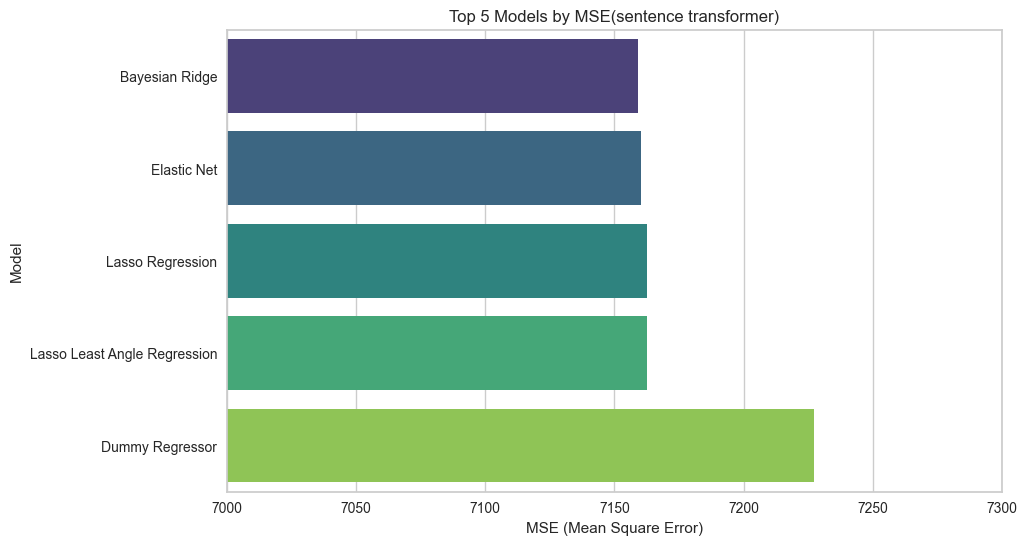

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

results_df = pull()

top_5_results = results_df[['Model', 'MSE']].head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='MSE', y='Model', data=top_5_results, palette='viridis')
plt.title('Top 5 Models by MSE(sentence transformer)')
plt.xlabel('MSE (Mean Square Error)')
plt.ylabel('Model')
plt.xlim(7000, 7300)
plt.show()

In [29]:
br = create_model('br', fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,81.3670,7576.7656,87.0446,0.0061,1.2278,2.9687
1,78.5199,6981.1187,83.5531,0.0103,0.9869,1.7601
2,74.5672,6736.3779,82.0754,0.0068,1.1037,2.4724
3,81.8817,7713.6890,87.8276,-0.0138,1.2182,2.9267
4,74.5767,6618.2754,81.3528,-0.0089,1.1356,2.6394
5,76.5169,6896.2593,83.0437,-0.0101,1.1170,2.4948
6,80.0359,7441.3105,86.2630,0.0248,1.1791,2.6404
7,78.3099,7144.2129,84.5234,-0.0076,1.0557,2.0629
8,77.0866,6993.4067,83.6266,-0.0305,1.0695,2.1888


In [30]:
en_tune = tune_model(lr, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,114.7054,19978.1191,141.3440,-1.6207,1.4124,2.8671
1,98.5639,15935.0713,126.2342,-1.2591,1.3415,1.9091
2,111.9499,20215.3711,142.1808,-1.9805,1.3692,3.2852
3,116.8886,22152.2773,148.8364,-1.9114,1.3792,3.4505
4,121.3430,21687.0078,147.2651,-2.3062,1.5295,2.9167
5,117.6005,22435.8066,149.7859,-2.2863,1.3672,2.9987
6,110.4950,18756.9434,136.9560,-1.4581,1.3715,3.5449
7,117.4478,19149.6348,138.3822,-1.7007,1.2922,2.5453
8,118.0786,20205.6914,142.1467,-1.9774,1.4592,2.9427


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [31]:
print(predict_model(br))

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,78.7973,7186.8823,84.7755,0.0018,1.1404,2.5439


      feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
523   -0.335311  -0.301845  -0.050029  -0.082974   0.097344  -0.232508   
167   -0.142456  -0.265719  -0.123073  -0.257284   0.138385  -0.448003   
657    0.052513  -0.394534   0.420434  -0.357165   0.185742  -0.241329   
488   -0.162201  -0.430819  -0.098416  -0.163720  -0.129160   0.138204   
1669  -0.269403  -0.485502   0.271871   0.213263   0.004627  -0.445964   
...         ...        ...        ...        ...        ...        ...   
1242  -0.157613  -0.447656   0.354918  -0.392770   0.041752  -0.134288   
838   -0.119391  -0.092947  -0.191903  -1.120426   0.390865  -0.035952   
214   -0.428093  -0.523788   0.026406  -0.193761   0.048432  -0.328809   
378   -0.067904  -0.401485  -0.300757  -0.700640   0.290774  -0.457848   
1664  -0.152488  -0.217577  -0.060340  -0.363106  -0.124643  -0.349259   

      feature_7  feature_8  feature_9  feature_10  ...  feature_761  \
523    0.063744   0.062519   0.372977   

In [ ]:
saved_en = save_model(en_tune, './en_sent')

In [ ]:
load_en = load_model('./en_sent')
load_en['trained_model']

In [37]:
#g

from pycaret.regression import *
optimizer = setup(X, target=y, train_size = 0.8)
comp = compare_models(sort='MSE')

,Description,Value
0,Session id,3488
1,Target,g
2,Target type,Regression
3,Original data shape,"(1674, 769)"
4,Transformed data shape,"(1674, 769)"
5,Transformed train set shape,"(1339, 769)"
6,Transformed test set shape,"(335, 769)"
7,Numeric features,768
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,69.3544,5855.8356,76.5042,0.0142,1.0543,2.0988,0.0240
br,Bayesian Ridge,69.2754,5858.5323,76.5212,0.0137,1.0532,2.0890,0.0650
llar,Lasso Least Angle Regression,69.6748,5920.9314,76.9270,0.0032,1.0559,2.0966,0.0230
lasso,Lasso Regression,69.6749,5920.9325,76.9270,0.0032,1.0559,2.0966,0.0220
et,Extra Trees Regressor,69.2279,5934.3655,77.0006,0.0008,1.0504,2.0677,2.0780
rf,Random Forest Regressor,69.3650,5944.9840,77.0820,-0.0013,1.0557,2.0965,5.7790
ada,AdaBoost Regressor,69.9511,5958.8307,77.1735,-0.0033,1.0727,2.1941,1.4930
dummy,Dummy Regressor,70.2768,5995.3936,77.4104,-0.0092,1.0654,2.1615,0.0360
gbr,Gradient Boosting Regressor,69.9681,6187.4881,78.6335,-0.0423,1.0581,2.0653,3.8290
lightgbm,Light Gradient Boosting Machine,70.3331,6345.4208,79.6363,-0.0693,1.0677,2.1170,1.0270


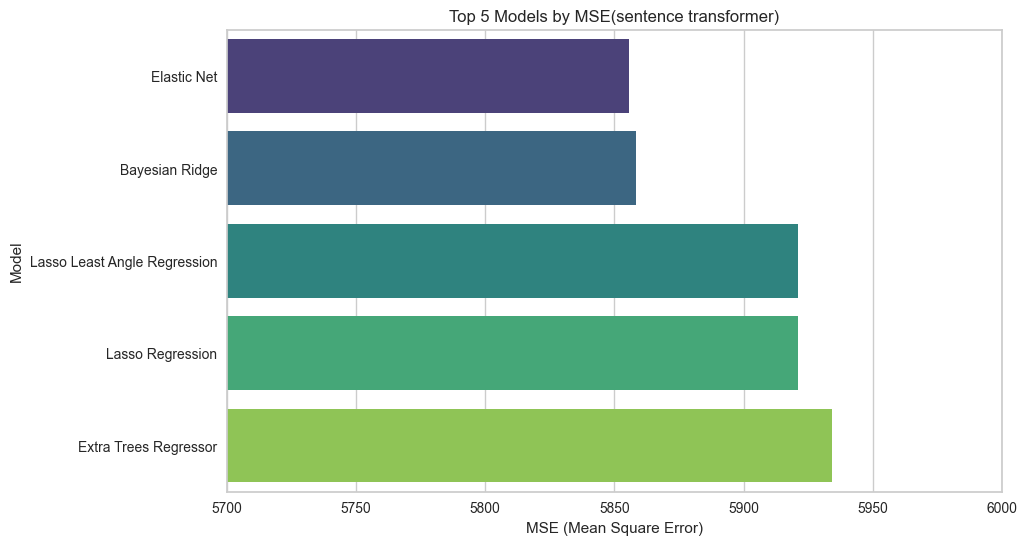

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

results_df = pull()

top_5_results = results_df[['Model', 'MSE']].head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='MSE', y='Model', data=top_5_results, palette='viridis')
plt.title('Top 5 Models by MSE(sentence transformer)')
plt.xlabel('MSE (Mean Square Error)')
plt.ylabel('Model')
plt.xlim(5700, 6000)
plt.show()

In [42]:
#b

from pycaret.regression import *
optimizer = setup(X, target=y, train_size = 0.8)
comp = compare_models(sort='MSE')

,Description,Value
0,Session id,2909
1,Target,b
2,Target type,Regression
3,Original data shape,"(1674, 769)"
4,Transformed data shape,"(1674, 769)"
5,Transformed train set shape,"(1339, 769)"
6,Transformed test set shape,"(335, 769)"
7,Numeric features,768
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,70.7804,6075.7124,77.8903,0.0105,1.0454,2.0579,0.0300
lasso,Lasso Regression,70.7804,6075.7143,77.8903,0.0105,1.0454,2.0579,0.0280
en,Elastic Net,70.9775,6086.7070,77.9624,0.0088,1.0471,2.0675,0.0250
br,Bayesian Ridge,70.9890,6096.1548,78.0219,0.0073,1.0469,2.0642,0.0710
rf,Random Forest Regressor,70.3991,6124.2771,78.2057,0.0019,1.0446,2.0405,5.9870
et,Extra Trees Regressor,70.4143,6151.3768,78.3671,-0.0015,1.0413,2.0230,2.0560
ada,AdaBoost Regressor,71.4902,6168.5454,78.4898,-0.0050,1.0620,2.1506,1.5040
dummy,Dummy Regressor,71.6251,6170.8457,78.5003,-0.0050,1.0548,2.1122,0.0280
gbr,Gradient Boosting Regressor,71.5467,6458.5025,80.2907,-0.0516,1.0522,2.0399,4.1060
lightgbm,Light Gradient Boosting Machine,71.0477,6555.4668,80.8725,-0.0679,1.0521,2.0244,0.8510


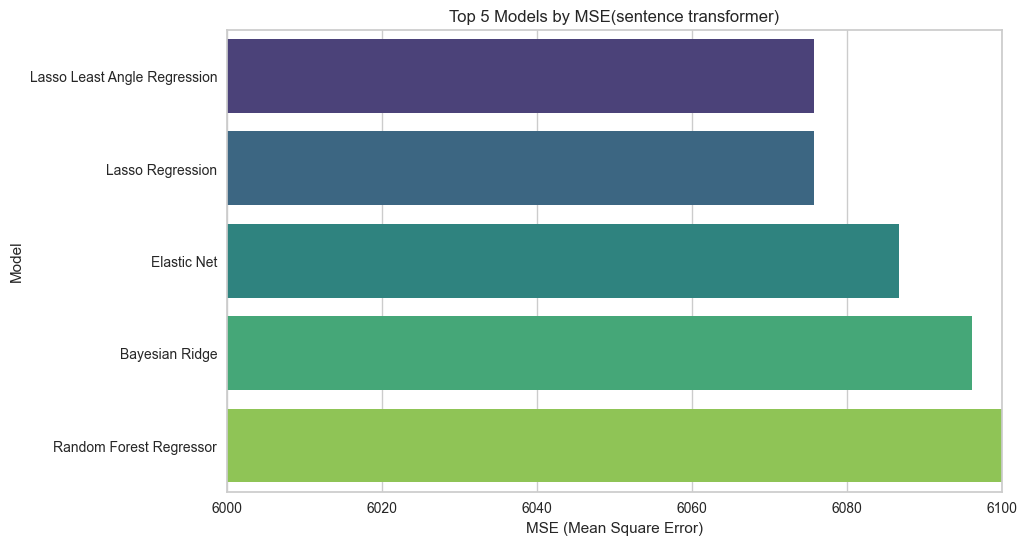

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

results_df = pull()

top_5_results = results_df[['Model', 'MSE']].head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='MSE', y='Model', data=top_5_results, palette='viridis')
plt.title('Top 5 Models by MSE(sentence transformer)')
plt.xlabel('MSE (Mean Square Error)')
plt.ylabel('Model')
plt.xlim(6000, 6100)
plt.show()

## sentencetransformer로 임베딩된 벡터로 딥러닝

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

In [ ]:
print(torch.__version__)

In [ ]:
import torch
print(f"MPS 장치를 지원하도록 build가 되었는가? {torch.backends.mps.is_built()}")
print(f"MPS 장치가 사용 가능한가? {torch.backends.mps.is_available()}") 

## 사전 학습된 word2vec을 불러와 lstm으로 학습

In [ ]:
ko_model = ('ko.bin')

In [11]:
import gensim

In [12]:
ko_model = gensim.models.Word2Vec.load('./ko.bin')

In [ ]:
print(len(ko_model.wv.vocab))

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = new_corpus
y = df[['r', 'g', 'b']]

In [15]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2)

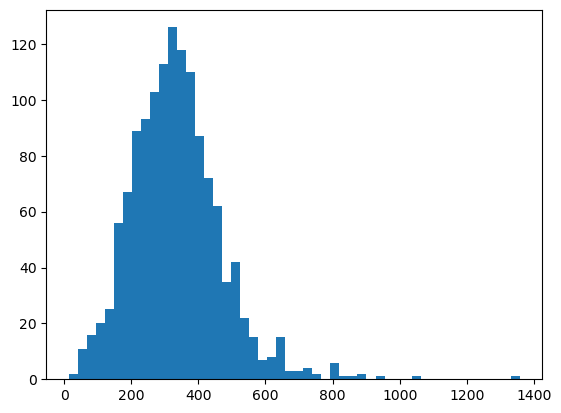

In [24]:
import matplotlib.pyplot as plt

plt.hist([len(sample) for sample in X_train], bins=50)
plt.show()

In [25]:
print(sum(map(len, X_train))/len(X_train))

334.3383121732636


In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [26]:
max_len = 334
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (349,) + inhomogeneous part.

In [31]:
def pad_sequences_manual(sequences, maxlen=None):
    padded_sequences = []
    for seq in sequences:
        if len(seq) > maxlen:
            seq = seq[:maxlen]
        elif len(seq) < maxlen:
            padding_length = maxlen - len(seq)
            seq = seq + "0" * padding_length
        padded_sequences.append(seq)
    return padded_sequences

In [32]:
X_train = pad_sequences_manual(X_train, max_len)
X_test = pad_sequences_manual(X_test, max_len)

In [33]:
import tensorflow

In [34]:
earlystop_callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [35]:
vocab_size = 30185
hidden_units = 128
num_output = 3
embedding_dim = 128

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(128))
model.add(LSTM(64))
model.add(Dense(num_output))

/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [20]:
def token_to_idx(doc, unk_idx):
    idx_list = []
    for token in doc.split(' '):
        if token == '0':
            idx_list.append(0)
            continue
        try:
            idx_list.append(ko_model.wv[token])
        except:
            idx_list.append(unk_idx)
    return idx_list

In [21]:
for i in range(len(X_train)):
    X_train[i] = token_to_idx(X_train[i], 0)
for i in range(len(X_test)):
    X_test[i] = token_to_idx(X_test[i], 0)

KeyError: 0

In [45]:
print(len(X_train[3]))

82


In [32]:
print(len(X_train[-1]))

196


In [36]:
from tensorflow.keras.optimizers import Adam

In [37]:
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mse'])

In [ ]:
model.fit(X_train, y_train, epochs=1, batch_size=64, validation_data=(X_test, y_test), verbose=1, callbacks=[earlystop_callback])